In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Defining company symbol and time range
symbol_amazon = 'AMZN'
starting_date = '2023-06-01'
ending_date = '2023-06-25'
intervals = '1m'  # 1-minute interval

# Spliting time range into smaller intervals
range_data = pd.date_range(start=starting_date, end=ending_date, freq='7D')

# Creating empty dataframe to store data
dataset = pd.DataFrame()

# Data Retrieval process
for i in range(len(range_data) - 1):
    interval_start = range_data[i]
    interval_end = range_data[i + 1]

    # Downloading data
    data_interval = yf.download(symbol_amazon, start=interval_start, end=interval_end, interval=intervals)

    # Appending interval data
    dataset = pd.concat([dataset, data_interval])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-01 09:30:00-04:00,120.690002,121.570000,120.610001,121.550003,121.550003,1773493
2023-06-01 09:31:00-04:00,121.558701,121.559998,120.904198,121.050003,121.050003,286869
2023-06-01 09:32:00-04:00,121.052399,121.220001,120.849998,121.070000,121.070000,253911
2023-06-01 09:33:00-04:00,121.059998,121.099998,120.663597,120.856003,120.856003,237820
2023-06-01 09:34:00-04:00,120.860001,120.860001,120.160004,120.330002,120.330002,346930


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5452 entries, 2023-06-01 09:30:00-04:00 to 2023-06-21 15:59:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5452 non-null   float64
 1   High       5452 non-null   float64
 2   Low        5452 non-null   float64
 3   Close      5452 non-null   float64
 4   Adj Close  5452 non-null   float64
 5   Volume     5452 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 298.2 KB


In [4]:
dataset['Midprice'] = (dataset['High'] + dataset['Low']) / 2
dataset['Microprice'] = (dataset['Open'] + dataset['Close']) / 2
dataset['Spread'] = dataset['Close'] - dataset['Open']
dataset['Volume Imbalance'] = (dataset['Open'] - dataset['Close']) / (dataset['Open'] + dataset['Close'])

In [5]:
# Data resampling
dataset['Time'] = (dataset.index - dataset.index[0]).total_seconds()
data_resampled = dataset.resample('5S').interpolate()

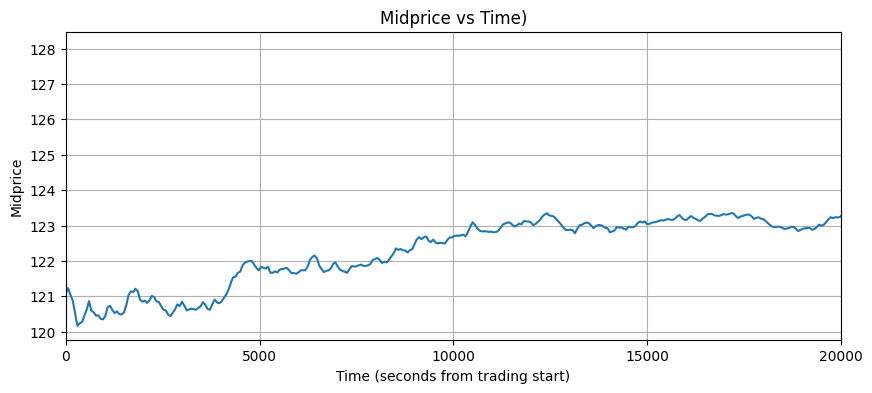

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(data_resampled['Time'], data_resampled['Midprice'])
plt.xlabel('Time (seconds from trading start)')
plt.ylabel('Midprice')
plt.title('Midprice vs Time)')

plt.xlim(0, 20000)
plt.xticks([0, 5000, 10000, 15000, 20000])

plt.grid(True)
plt.show()

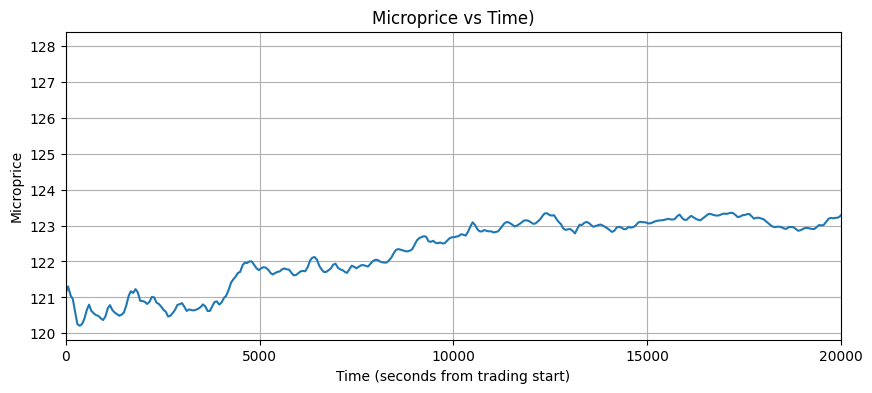

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(data_resampled['Time'], data_resampled['Microprice'])
plt.xlabel('Time (seconds from trading start)')
plt.ylabel('Microprice')
plt.title('Microprice vs Time)')

plt.xlim(0, 20000)
plt.xticks([0, 5000, 10000, 15000, 20000])

plt.grid(True)
plt.show()

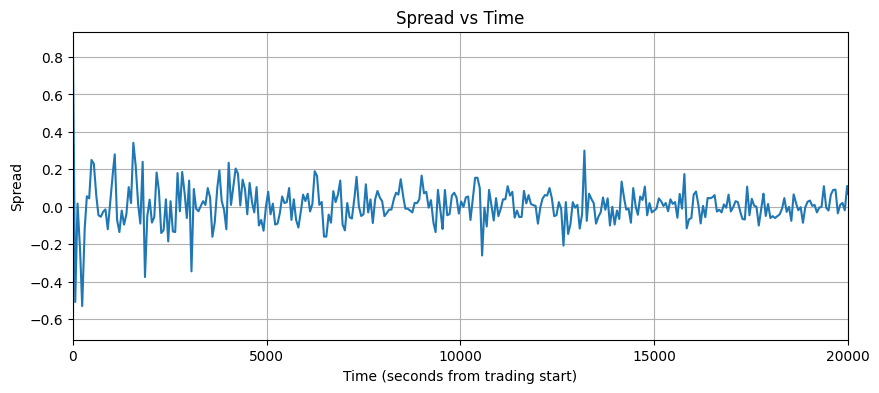

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(data_resampled['Time'], data_resampled['Spread'])
plt.xlabel('Time (seconds from trading start)')
plt.ylabel('Spread')
plt.title('Spread vs Time')

plt.xlim(0, 20000)
plt.xticks([0, 5000, 10000, 15000, 20000])

plt.grid(True)
plt.show()

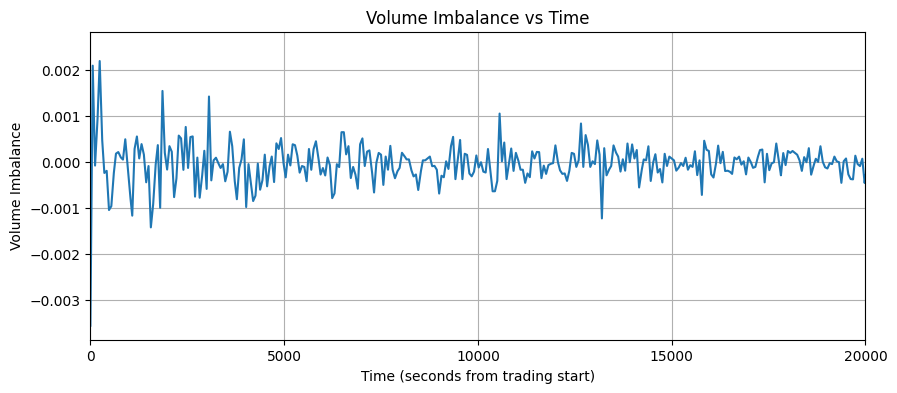

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(data_resampled['Time'], data_resampled['Volume Imbalance'])
plt.xlabel('Time (seconds from trading start)')
plt.ylabel('Volume Imbalance')
plt.title('Volume Imbalance vs Time')

plt.xlim(0, 20000)
plt.xticks([0, 5000, 10000, 15000, 20000])

plt.grid(True)
plt.show()

In [12]:
import numpy as np

In [13]:
S_0 = 100
N_s = 10 ** 6 #Initial number of stocks
Time = 1;
k = 1e-3;
b = 1e-4
M_times = 1000;    #Number of trading times
alpha_value = 0.1;
phi_value = 0.01;
sigma_value = 0.30;

In [16]:
gamma_value = np.sqrt(phi_value/k);
xi = (alpha_value - 0.5 * b + np.sqrt(k * phi_value))/(alpha_value - 0.5 * b - np.sqrt(k * phi_value));
tt = np.linspace(0, 1, M_times + 1)

In [21]:
v = np.zeros((M_times + 1, 1))
q = np.zeros((M_times + 1, 1))
v[0] = 0
q[0] = N_s
for t in range(1, M_times + 1):
    v[t] = gamma_value * (xi * np.exp(gamma_value * (Time-tt[t-1])) + np.exp(- gamma_value * (Time-tt[t-1]))) / (xi * np.exp(gamma_value * (Time-tt[t-1])) - np.exp(- gamma_value * (Time-tt[t-1]))) * q[t-1] * Time/M_times
    q[t] = (xi * np.exp(gamma_value * (Time-tt[t-1])) - np.exp(- gamma_value * (Time-tt[t-1]))) / (xi * np.exp(gamma_value * Time) - np.exp(- gamma_value * Time)) * N_s

Text(0.5, 1.0, 'Optimal Trading Speed')

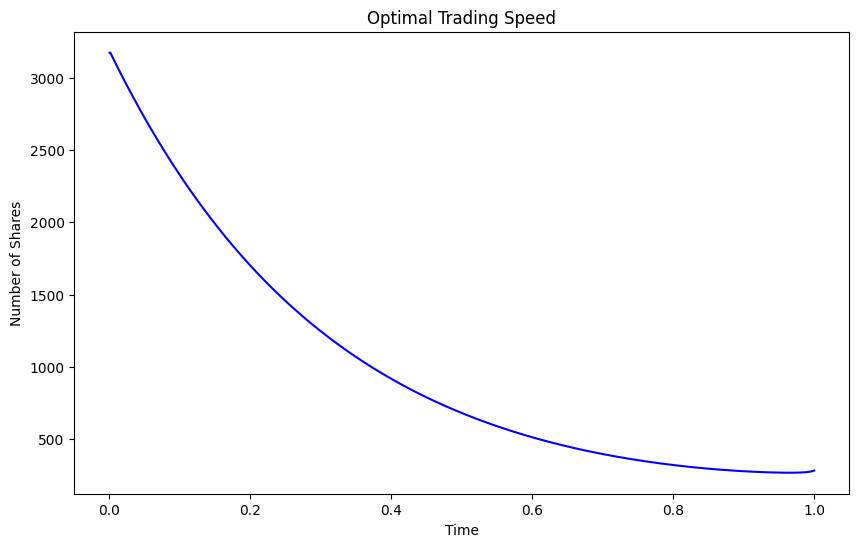

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Optimal Trading Speed')

Text(0.5, 1.0, 'Inventory')

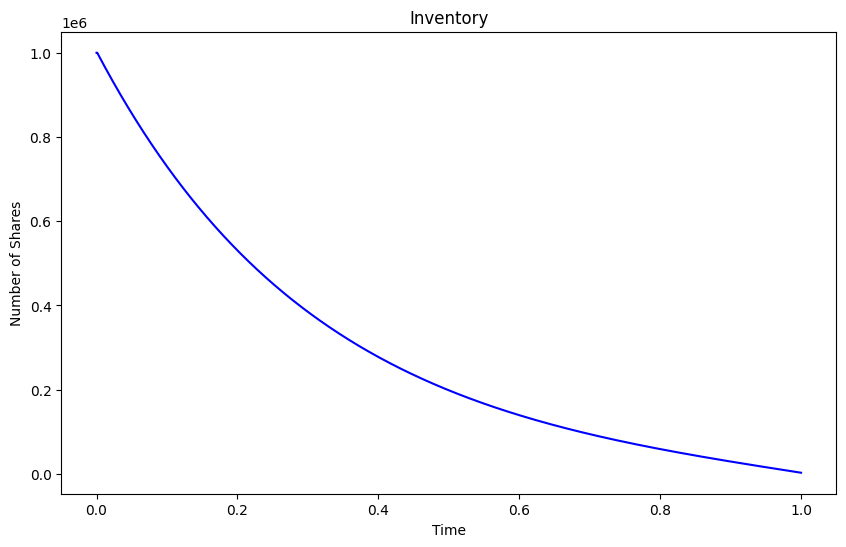

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

In [24]:
T = 1
Ndt = 16.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.103
b = 0.104

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-3, 0.1, 100, 10000])
symb = np.array(["o", "*", "+", "^"])

alpha = 1

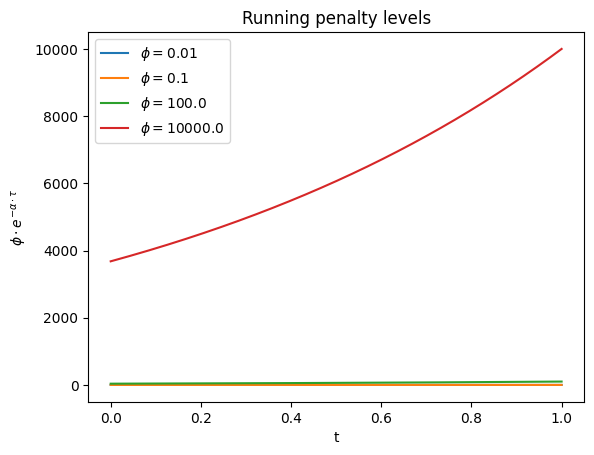

In [26]:
for phi, symbol in zip(myphi, symb):
    plt.plot(t, phi * np.exp(-alpha * tau), label=r"$\phi = {}$".format(phi))

plt.xlabel("t")
plt.ylabel(r"$\phi \cdot e^{-\alpha \cdot \tau}$")
plt.title("Running penalty levels")
plt.legend()
plt.show()